# Import Libraries 

In [1]:
pip install -U scikit-learn xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [4]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head(10)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [5]:
# Show the segmented DataFrame
print(df.head())

   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Feature Encoding

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" and User ID into numeric values

In [7]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Example dataset with multiple categorical features and a target variable 'Rating'

# Create DataFrame
df_full = pd.DataFrame(df)

# Features and target
X = df_full[['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID']]
y = df_full['Rating']

# Initialize CatBoostEncoder
encoder = ce.CatBoostEncoder(cols=['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID'])

# Fit and transform the training data
X_encoded = encoder.fit_transform(X, y)

# Rename the new encoded columns
X_encoded.columns = ['Product Name_encoded', 'Brand_encoded', 'Category_encoded', 'Color_encoded', 'Size_encoded', 'User ID_encoded']

# Drop the original categorical columns
df_updated = df_full.drop(columns=['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID'])

# Join the encoded features back to the original DataFrame
df_encoded = pd.concat([df_updated, X_encoded], axis=1)


In [8]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [9]:
df_new = pd.DataFrame(df_encoded)
df_new

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
0,1,40,1.043159,2.993135,2.993135,2.993135,2.993135,2.993135,2.993135
1,2,82,4.026416,2.993135,2.993135,2.993135,2.018147,2.993135,2.993135
2,3,44,3.337938,2.018147,2.018147,3.509776,2.993135,2.018147,2.993135
3,4,23,1.049523,3.509776,2.993135,2.018147,2.993135,2.993135,2.993135
4,5,79,4.302773,2.993135,2.458077,1.695272,2.687570,2.993135,2.993135
...,...,...,...,...,...,...,...,...,...
995,996,55,1.620081,2.908854,3.003209,3.003089,2.925438,2.953345,2.891994
996,997,13,1.544464,3.161843,2.884686,3.038584,3.070148,3.006161,3.361617
997,998,47,3.961913,3.152329,2.996362,2.938688,3.025818,3.000314,2.623336
998,999,68,3.089722,2.954329,3.001118,2.998847,2.976151,3.025326,3.162969


Here, we have created a feature matrix where:

Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features including User ID as this feature is iterative and repeats several times in the dataset.Choosing User ID as a categorical variable will allow us to capture a group-specific patterns such as preferences, activity levels.

In [10]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 9)


In [11]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            1000 non-null   int64  
 1   Price                 1000 non-null   int64  
 2   Rating                1000 non-null   float64
 3   Product Name_encoded  1000 non-null   float64
 4   Brand_encoded         1000 non-null   float64
 5   Category_encoded      1000 non-null   float64
 6   Color_encoded         1000 non-null   float64
 7   Size_encoded          1000 non-null   float64
 8   User ID_encoded       1000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


All columns are now numeric.

In [12]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.785000,2.993135,2.966473,2.961967,2.969352,2.965415,2.965117,2.976524
std,288.819436,26.291748,1.153185,0.217152,0.193344,0.159867,0.141875,0.136690,0.407035
min,1.000000,10.000000,1.000967,1.983693,2.018147,1.695272,1.799803,1.656591,1.701480
25%,250.750000,33.000000,1.992786,2.831600,2.854746,2.878439,2.877145,2.929529,2.721392
50%,500.500000,57.000000,2.984003,2.943164,2.930428,3.002708,2.982633,2.982184,2.993135
75%,750.250000,78.250000,3.985084,3.077073,3.106158,3.056833,3.048068,3.012145,3.228626
max,1000.000000,100.000000,4.987964,3.939873,3.828578,3.815558,3.953299,3.647954,4.266373


# Train/Test Split

Partition sizes with a 70/30 train/test split

In [13]:
len(df_new) * .7, len(df_new) * .3

(700.0, 300.0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, 
                                                    random_state=47)

In [15]:
X_train.shape, X_test.shape

((700, 9), (300, 9))

In [16]:
y_train.shape, y_test.shape

((700,), (300,))

In [17]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Product ID                int64
Price                     int64
Rating                  float64
Product Name_encoded    float64
Brand_encoded           float64
Category_encoded        float64
Color_encoded           float64
Size_encoded            float64
User ID_encoded         float64
dtype: object

In [18]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

Product ID                int64
Price                     int64
Rating                  float64
Product Name_encoded    float64
Brand_encoded           float64
Category_encoded        float64
Color_encoded           float64
Size_encoded            float64
User ID_encoded         float64
dtype: object

We have only numeric features in our X now!

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            1000 non-null   int64  
 1   Price                 1000 non-null   int64  
 2   Rating                1000 non-null   float64
 3   Product Name_encoded  1000 non-null   float64
 4   Brand_encoded         1000 non-null   float64
 5   Category_encoded      1000 non-null   float64
 6   Color_encoded         1000 non-null   float64
 7   Size_encoded          1000 non-null   float64
 8   User ID_encoded       1000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [20]:
import pandas as pd
correlation_matrix = X_train.corr()
correlation_matrix

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
Product ID,1.000000,0.031849,0.013083,-0.023073,0.054740,0.007234,0.047833,0.031528,0.062028
Price,0.031849,1.000000,0.022195,-0.021768,-0.044327,0.052582,0.008400,0.009211,0.013732
Rating,0.013083,0.022195,1.000000,0.001814,0.005317,0.015154,-0.045281,0.012543,-0.031498
Product Name_encoded,-0.023073,-0.021768,0.001814,1.000000,0.129485,-0.047921,0.087746,0.013802,0.005867
Brand_encoded,0.054740,-0.044327,0.005317,0.129485,1.000000,-0.002885,0.145163,-0.011148,-0.014389
Category_encoded,0.007234,0.052582,0.015154,-0.047921,-0.002885,1.000000,-0.026674,0.129205,0.017597
Color_encoded,0.047833,0.008400,-0.045281,0.087746,0.145163,-0.026674,1.000000,-0.085906,-0.017502
Size_encoded,0.031528,0.009211,0.012543,0.013802,-0.011148,0.129205,-0.085906,1.000000,-0.048172
User ID_encoded,0.062028,0.013732,-0.031498,0.005867,-0.014389,0.017597,-0.017502,-0.048172,1.000000


# Method 1 - Random Forest Model

# Define the pipeline

In [21]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=47, min_samples_split=10)
)

In [22]:
X_train.head()

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
128,129,85,2.104322,2.669062,3.059661,3.143416,2.926661,3.021098,2.993135
492,493,88,3.126248,2.807486,2.844828,2.991981,2.969442,3.011958,2.880183
303,304,85,1.300399,2.828699,2.836282,3.119169,3.084120,2.922178,3.099555
120,121,96,1.633990,2.629612,3.506794,2.750206,3.018945,2.970156,2.993135
455,456,14,4.435461,2.810580,3.213892,2.867895,2.836171,2.886689,2.341233


# Fit and assess performance using cross-validation

In [23]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5, scoring='r2')


In [24]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.99993442, 0.9999444 , 0.99992111, 0.99989516, 0.99991613])

In [25]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9999222424807789, 1.68017577727131e-05)

# Hyperparameter search using GridSearchCV

In [26]:
n_est = [100, 200, 300]
max_depth=[5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
grid_params = {
    'randomforestregressor__n_estimators': n_est, 
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split,
    'randomforestregressor__min_samples_leaf': min_samples_leaf
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'randomforestregressor__max_depth': [5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10],
 'randomforestregressor__min_samples_leaf': [1, 2, 4]}

In [27]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [28]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=10,
                                                              min_samples_split=10,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [29]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 300}

In [30]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.99996988, 0.99997802, 0.99996608, 0.99995874, 0.99996718])

In [31]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9999679805838021, 6.22958988848313e-06)

There is a slight improvement in performance after performing a hyperparameter tuning as compared to has been seen from the default CV results.

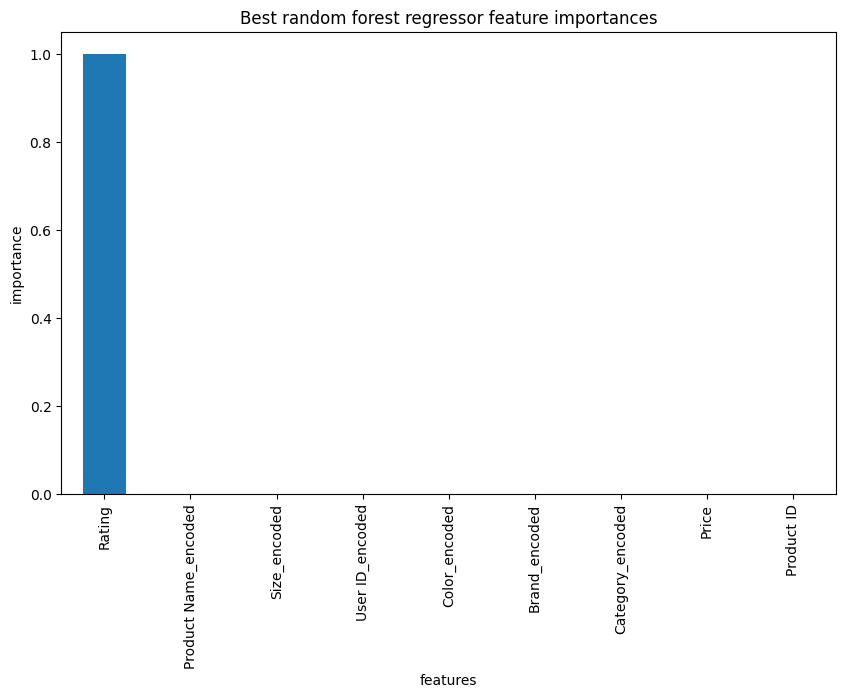

In [32]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Rating                  0.999956
Product Name_encoded    0.000007
Size_encoded            0.000006
User ID_encoded         0.000006
Color_encoded           0.000006
Brand_encoded           0.000005
Category_encoded        0.000005
Price                   0.000005
Product ID              0.000004
dtype: float64


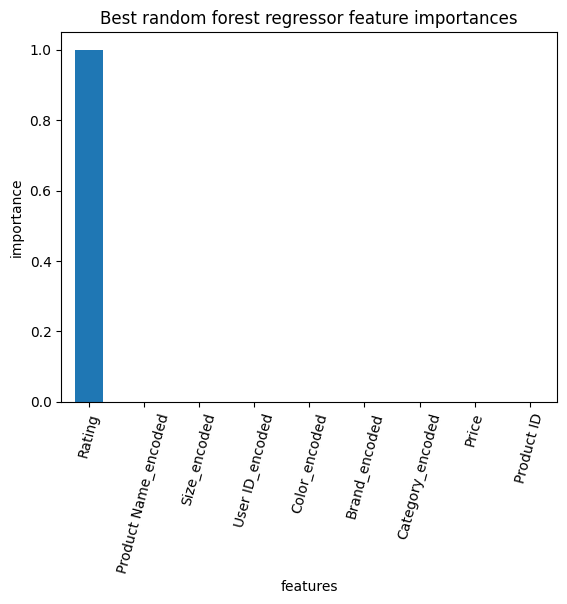

In [33]:
# Get the top N important features (e.g., top 3)
top_n = 20
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xticks(rotation=75)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

A bar plot of feature importances above helps us identify following features contribute most to a model’s predictions:
Product ID, Price, User ID_24, User ID_30, User ID_83, Category_Kids Fashion, Size_M, User ID_26, User ID_76, User ID_51 are all top features.

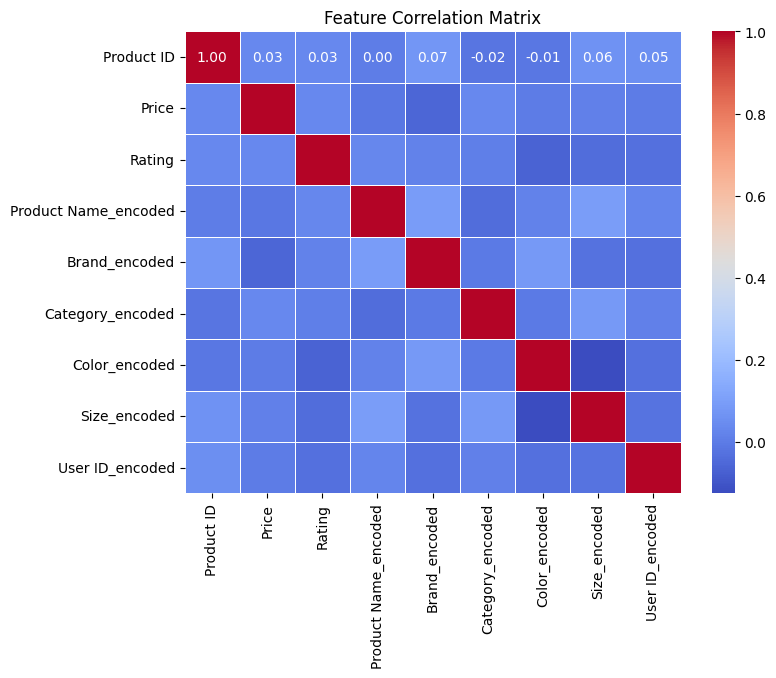

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [35]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[2.89267219 4.94839789 1.25833541 4.74257285 2.04294343 2.40877201
 1.450853   1.6088083  4.94770109 3.12661006 2.40854618 2.40272049
 3.93330891 2.57408504 1.37663543 1.727262   3.73829023 1.65804295
 1.84273086 2.24206271 3.70237949 1.06464206 4.65764293 4.59718504
 2.65878502 4.17504458 1.84278533 2.03925084 4.30348012 2.25959385
 4.17004215 4.35883487 3.46572125 2.59745253 3.55613083 2.05364412
 3.72704114 2.32730522 3.95935712 2.09792492 4.97646056 2.23223649
 2.00125507 3.8115158  3.26184973 4.50788552 4.3046678  2.19019873
 3.92382178 2.50331216 1.94358668 1.02664527 3.93980014 4.86944573
 1.49598435 2.14616974 1.02323362 2.19464795 3.24905876 2.92460916
 2.60519256 3.49158764 1.89451988 4.15053917 2.93847615 4.43829734
 4.50575319 1.40032958 2.58534846 1.19978405 2.39334461 1.87772523
 2.00002748 1.56915515 3.15263943 2.77406639 2.4408139  2.43161352
 4.73225035 2.5738587  3.18179938 1.17807737 1.68995782 3.66841918
 1.8395101  2.40876672 2.60608718 3.14757884 1.94405897 3.0888

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
Mean Absolute Error: 0.00
RMSE: 0.004580684921527502
R-squared: 1.00


This is an issue, R square still not significant.

In [37]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  0.9999832737047378


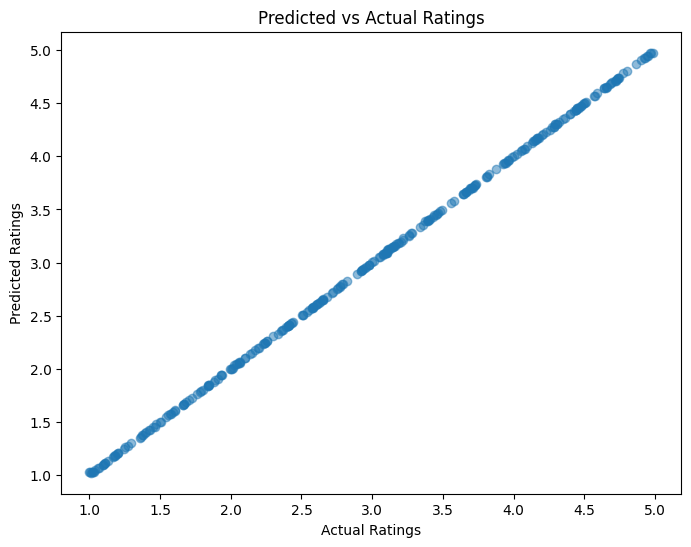

In [38]:
# Plot predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Analyzing Predicted Ratings Distribution

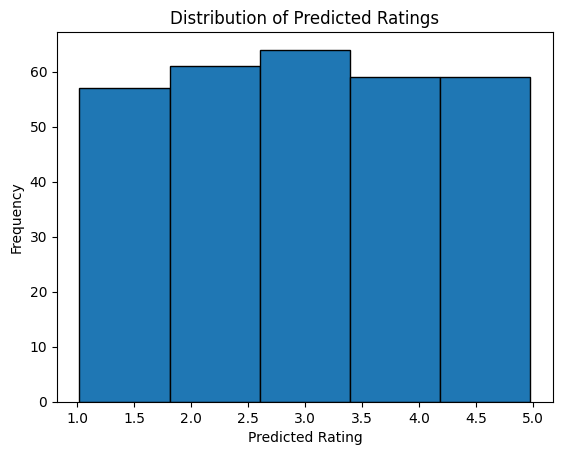

In [39]:
import matplotlib.pyplot as plt

# Simulate predicted ratings for users
predicted_ratings = y_pred

# Plot histogram of predicted ratings
plt.hist(predicted_ratings, bins=5, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()

This mentions 3.0 is the most common rating and 2.5 comes second.

# Method 2 - XG BOOST MODEL

# Initialize, Build and Train the XGBoost Model

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             max_depth=6, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Assess performance using RMSE, MAE, MSE

In [41]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')


Mean Absolute Error (MAE): 0.007717887810233643
R-squared: 0.999918999913102
RMSE: 0.010235519225721785
Mean Squared Error: 0.0001047658538201203


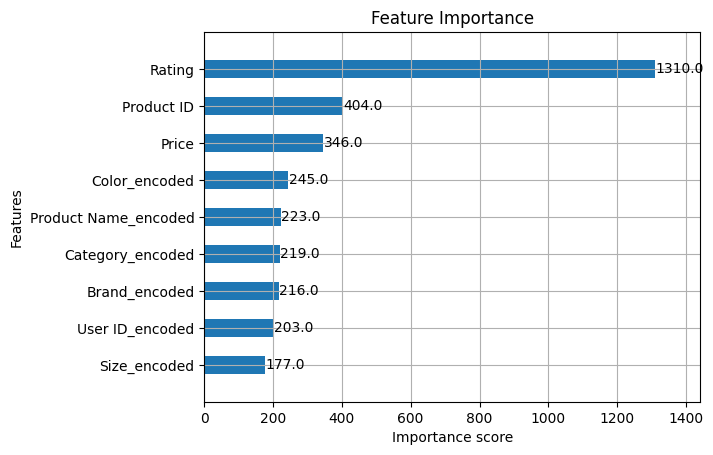

In [42]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Hyperparameter search using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Score (Negative MSE): -0.00015006011548451893


# Method 3 - CATBOOST MODEL

Here we are predicting predicting a target like ratings (a continuous variable) based on a variety of features (both numerical and categorical) features such as Price (numerical), Product Name, User ID, Category, Size, Color, Brand (categorical).

In [44]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df.drop(columns=['Rating'])
y = df['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create CatBoost model
model_cat = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate,   # Loss function for regression,  # Specify which features are categorical
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=False             # Output every 200 iterations
)

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

y_pred_cat

array([2.86024265, 3.0135275 , 3.04387003, 2.92618132, 2.79819699,
       2.86710645, 3.10965106, 2.98111996, 3.06530415, 3.16139732,
       3.27274822, 3.04851977, 3.14188895, 3.35205994, 3.33870917,
       3.04545086, 3.43585709, 2.96443852, 2.85800071, 2.86711157,
       2.72899619, 2.88956217, 3.08204445, 3.05157333, 2.71053707,
       2.8968089 , 3.05136956, 3.64117743, 3.05824284, 2.90642078,
       3.26039056, 2.95146014, 2.72783963, 2.95490008, 2.93316141,
       2.62044958, 3.18498137, 2.65395764, 3.28266014, 3.16091055,
       3.3037404 , 3.16088814, 2.72490718, 3.89639684, 2.94226227,
       2.84662578, 3.38390587, 3.18304556, 2.68160178, 3.24335973,
       2.96592967, 3.25694128, 3.24966009, 3.33941739, 3.42499461,
       3.18685015, 3.02528875, 3.16763998, 3.07114365, 2.89732835,
       3.02578454, 3.07874867, 3.15623594, 3.26141923, 3.08982408,
       2.95077634, 2.86712751, 3.24885546, 3.13362751, 2.94790858,
       2.84611375, 2.49433753, 3.03180613, 3.32940359, 2.80908

In [45]:
print(df.columns.tolist())

['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price', 'Rating', 'Color', 'Size']


In [46]:
# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_cat)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.5307041383006932


In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_cat)
print(f"R-squared: {r2}")

R-squared: -0.0763199744283769


This seems like a reasonable RMSE, even though R-square is not that significant but RMSE is pretty reasonable.

In [48]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mse = mean_squared_error(y_test, y_pred_cat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')

Mean Absolute Error (MAE): 1.0744127080609798
R-squared: -1.099484783636243
RMSE: 1.2372162859826463
Mean Squared Error: 1.5307041383006932


In [49]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -1.1572025783753834


In [50]:
# Get feature importance
feature_importance = model_cat.get_feature_importance()

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)


        Feature  Importance
6         Color   16.397684
4      Category   16.279553
7          Size   14.774949
2  Product Name   14.630567
3         Brand   14.531810
0       User ID    8.449368
1    Product ID    7.830425
5         Price    7.105646


# Visualize Feature Importance

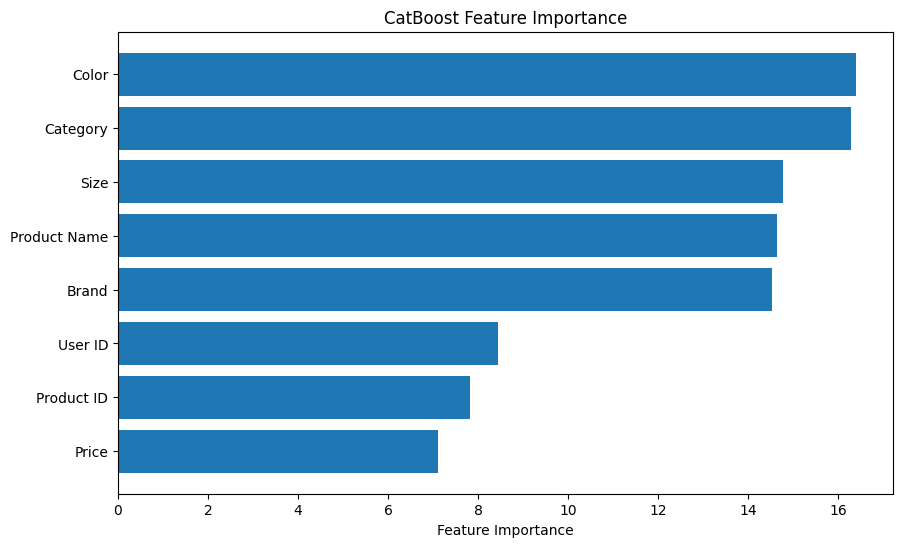

In [51]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Hyperparameter search using GridSearchCV

In [52]:
# Define the hyperparameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'od_wait': [300],
}

# Grid search
grid_search = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score (RMSE)
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # Negate because scoring is negative RMSE
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Best Hyperparameters: {'bagging_temperature': 0.0, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'od_wait': 300}
Best RMSE: 0.01608422863621688


Best RMSE: 0.016

We first Sort out the predicted ratings for each user in descending order and then Select the top N products with the highest predicted ratings.

This gives us the Top-N recommended products for each user based on the predicted ratings.

In [54]:
# Assuming `y_pred` are the predicted ratings and `X_test` contains the user-product pairs
X_test['Predicted Rating'] = y_pred_cat

# Define how many top recommendations per user you want
N = 5  # You can change this value to 5, 10, or any other number

# Sort by user ID and predicted rating to get top N recommendations
top_n_recommendations = X_test.sort_values(by=['User ID', 'Predicted Rating'], ascending=[True, False])

# For each user, get top N recommendations (e.g., top 3)
top_n_recommendations = top_n_recommendations.groupby('User ID').head(N)

print(top_n_recommendations[['User ID', 'Product ID', 'Predicted Rating']])

     User ID  Product ID  Predicted Rating
985        1         986          3.367446
946        1         947          3.268100
963        1         964          3.140486
464        1         465          2.981350
514        1         515          2.814781
..       ...         ...               ...
678       99         679          2.867106
110       99         111          2.844997
165      100         166          2.851344
81       100          82          2.694966
668      100         669          2.576668

[288 rows x 3 columns]


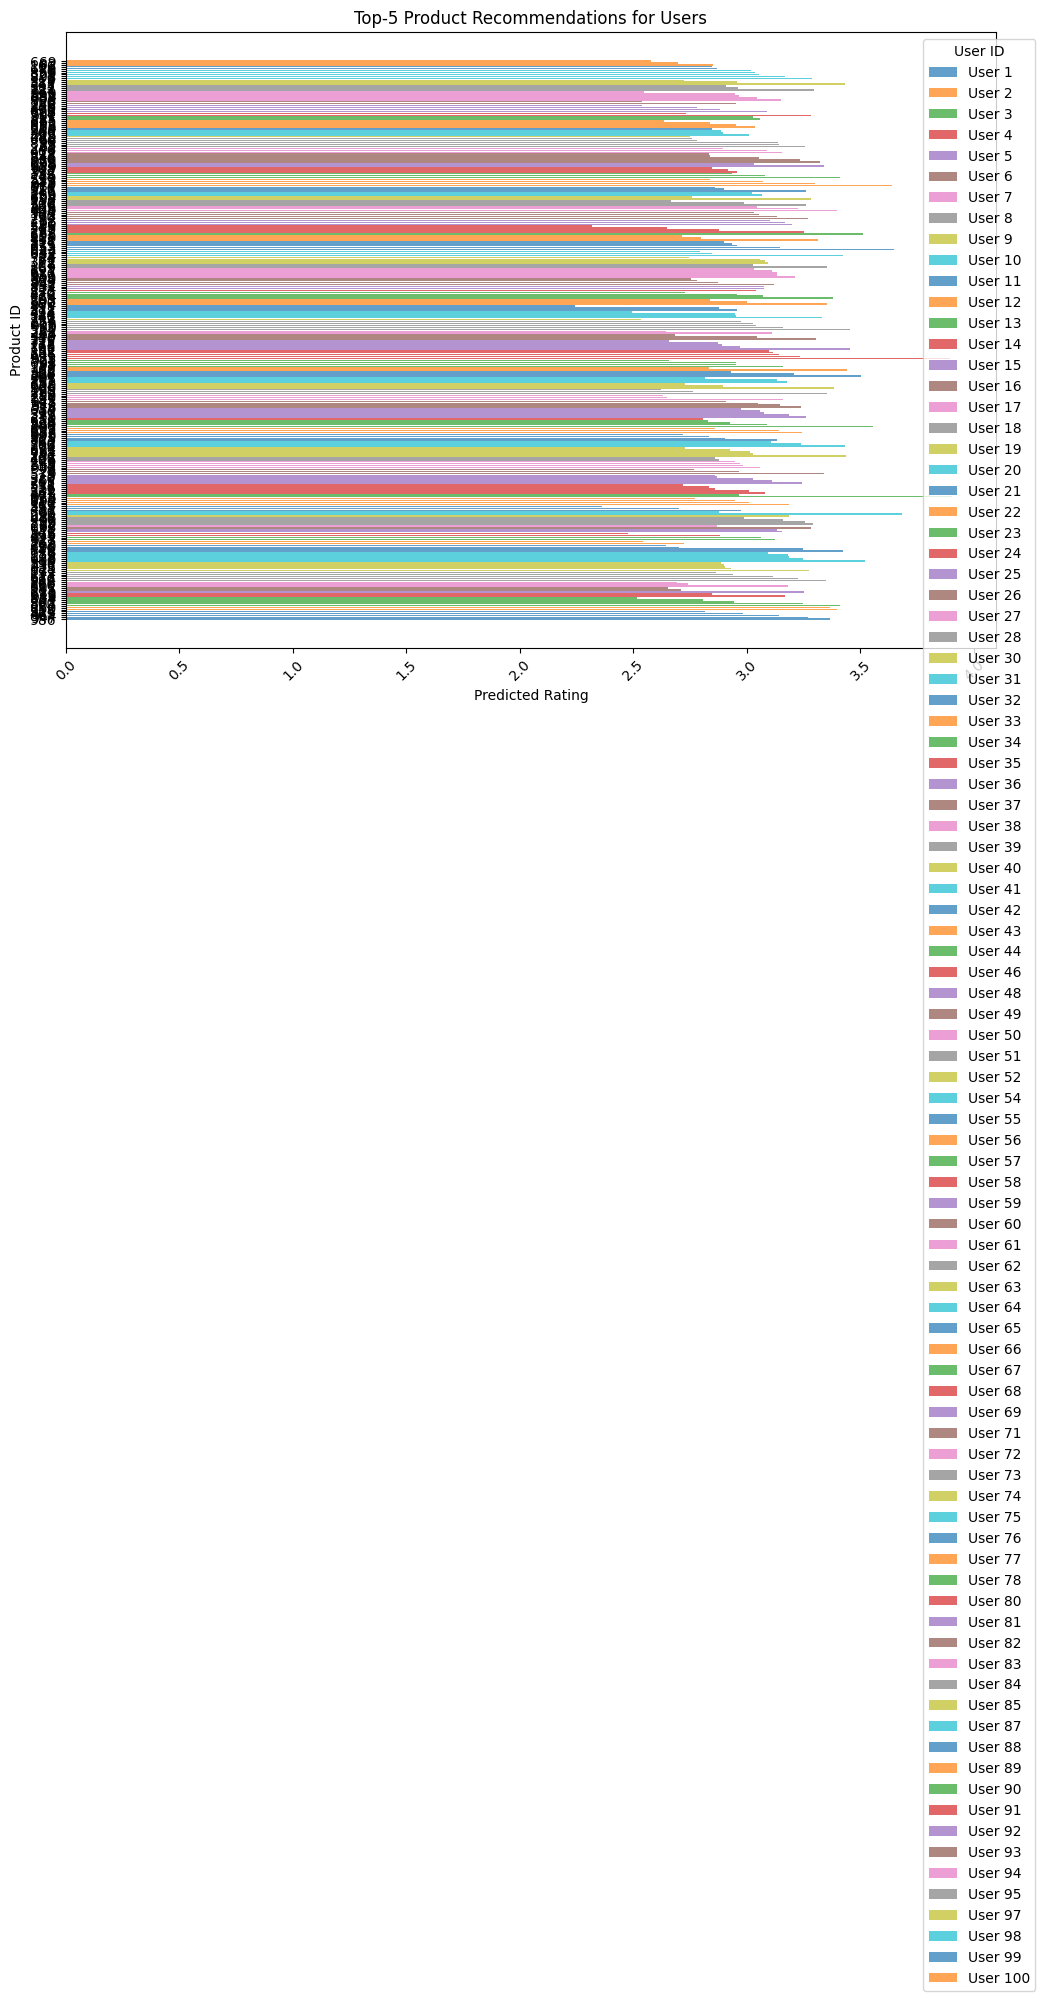

In [55]:
# Plot Top-N Recommendations for each user
plt.figure(figsize=(12, 8))  # Adjusted figure size for top N recommendations

# Iterate over each unique user
for user_id in top_n_recommendations['User ID'].unique():
    user_recommendations = top_n_recommendations[top_n_recommendations['User ID'] == user_id]
    
    # Plot the top N products for this user
    plt.barh(user_recommendations['Product ID'].astype(str), 
             user_recommendations['Predicted Rating'], 
             label=f'User {user_id}', alpha=0.7)

plt.xlabel('Predicted Rating')
plt.ylabel('Product ID')
plt.title(f'Top-{N} Product Recommendations for Users')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='User ID', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # Adjusts the layout to prevent overlap with the legend
plt.show()



# Method 4 - Singular Value Decomposition (SVD)

Here we are using SVD (Singular Value Decomposition) for collaborative filtering-based recommendation, that specifically shows how the User will rate a particular Product.

In [59]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item matrix (User x Movie)
# Create user-item interaction matrix (userId x productId)
user_item_matrix = df.pivot(index='User ID', columns='Product ID', values= "Rating")

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.head())

Product ID  1     2     3     4     5     6     7     8     9     10    ...  \
User ID                                                                 ...   
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Product ID  991   992   993   994   995   996   997   998   999   1000  
User ID                                                                 
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5       

# Collaborative Filtering Using Matrix Factorization (SVD)

Using Collaborative Filtering that uses user-item interactions (e.g., user ratings for products) to predict how a user might rate an item.

In [60]:
# Apply SVD for collaborative filtering (matrix factorization)
svd = TruncatedSVD(n_components=20)  # Use 20 latent features
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

# Example: Recommend products for a user
user_id = 1

user_ratings = reconstructed_matrix[user_id - 1]  # Indexing is 0-based, so we subtract 1

recommended_product_indices = user_ratings.argsort()[::-1]  # Sort products by predicted rating

# Display top 5 recommended products for user 1
recommended_products = df.iloc[recommended_product_indices[:5]]
print("Top 5 Recommended Products:")
print(recommended_products[['User ID', 'Product ID', 'Rating']])

Top 5 Recommended Products:
     User ID  Product ID    Rating
198       39         199  4.980656
887       39         888  4.953446
181       39         182  4.358913
92        33          93  4.928128
156       39         157  3.981751


# Content-based Filtering

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df_new[df_new['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df_new['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df_new[df_new['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
243         244     85  3.474622
481         482     97  3.578219
573         574     92  4.491894
628         629     95  3.579320
635         636     96  4.602211


In [62]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
198         199     15  4.980656
887         888     73  4.953446
181         182     68  4.358913
92           93     70  4.928128
156         157     67  3.981751
166         167     43  4.478061
601         602     11  4.342864
667         668     11  1.842279
731         732     28  2.645059
907         908     36  3.194487


In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 0.26672299932084487


The RMSE value of 0.266 for SVD-based Collaborative Filtering model suggests that the model is performing well.

# Segmenting the users into spending group

Segmenting users into high-spending or low-spending group can be used in data analysis and marketing strategy. By doing this, we can personalize marketing efforts, improve customer experience, and optimize business strategies. Here's I segment users based on these a key dimension — spending as how many users purchase the most products.

High-Spending: Users whose total spending or average purchase amount is above a threshold, 70.

Low-Spending: Users whose total spending or average purchase amount is below a certain threshold, which is 70.

In [64]:
# craete a new dataframe

df_seg = pd.DataFrame(df)

In [65]:
# Ensure 'Price' is always treated as an iterable (even if it's a single integer)

def handle_purchase_prices(Price):
    # since it's not a list or iterable, we will first make it a list
    if isinstance(Price, int):
        return [Price]
    return Price

In [66]:
# Apply the function to ensure 'purchase_prices' is a list

df_seg['Price'] = df_seg['Price'].apply(handle_purchase_prices)

In [67]:
# Feature: Total Purchase Amount (Total amount spent by the user)
df_seg['total_purchase_amount'] = df_seg['Price'].apply(lambda x: sum(x))


In [68]:
# Set thresholds for segmentation
spending_threshold = 70  # High spending if total_purchase_amount > 70

In [69]:
# Create new segmentation columns
df_seg['spending_segment'] = np.where(df_seg['total_purchase_amount'] > spending_threshold, 'High Spending', 'Low Spending')

In [70]:
df_seg = df_seg.drop(columns = ["Price"])

In [71]:
df_seg.head()

,User ID,Product ID,Product Name,Brand,Category,Rating,Color,Size,total_purchase_amount,spending_segment
0,19,1,Dress,Adidas,Men's Fashion,1.043159,Black,XL,40,Low Spending
1,97,2,Shoes,H&M,Women's Fashion,4.026416,Black,L,82,High Spending
2,25,3,Dress,Adidas,Women's Fashion,3.337938,Yellow,XL,44,Low Spending
3,57,4,Shoes,Zara,Men's Fashion,1.049523,White,S,23,Low Spending
4,79,5,T-shirt,Adidas,Men's Fashion,4.302773,Black,M,79,High Spending


# Segment-wise Analysis

# Compute Average Rating per Spending Segment

Calculating the average rating for each spending segment (e.g., Low Spending, High Spending) to see if there's a noticeable difference between them.

In [72]:
# Assuming 'data' is your dataframe containing 'spending_segment' and 'ratings'

# Group by spending segment and calculate the mean of ratings
average_ratings_by_segment = df_seg.groupby('spending_segment')['Rating'].mean()

print("Average Ratings by Spending Segment:")
print(average_ratings_by_segment)

Average Ratings by Spending Segment:
spending_segment
High Spending    3.035180
Low Spending     2.970891
Name: Rating, dtype: float64


There is somewhat difference between high spenders rating vs low spender rating. High spenders tends to rate products slightly more positively than low spenders.

# Visualize the Distribution of Ratings for Each Segment

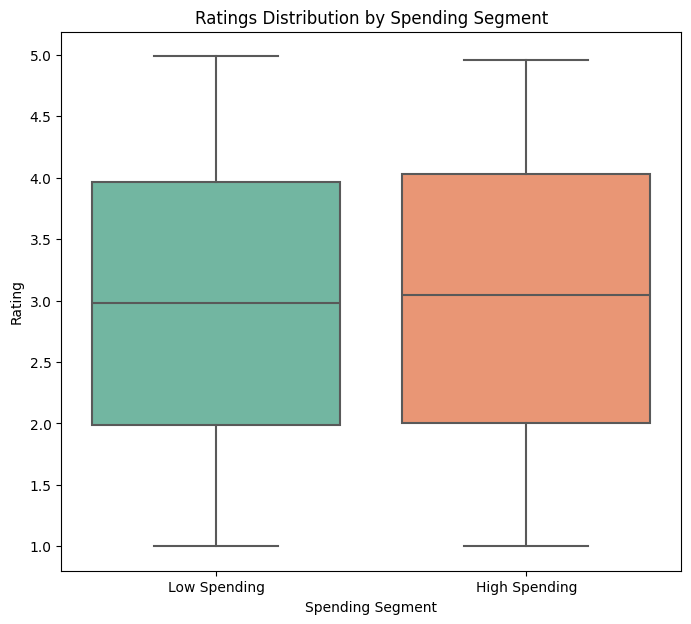

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare ratings between spending segments
plt.figure(figsize=(8, 7))
sns.boxplot(x='spending_segment', y='Rating', data=df_seg, palette="Set2")
plt.title('Ratings Distribution by Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rating')
plt.show()

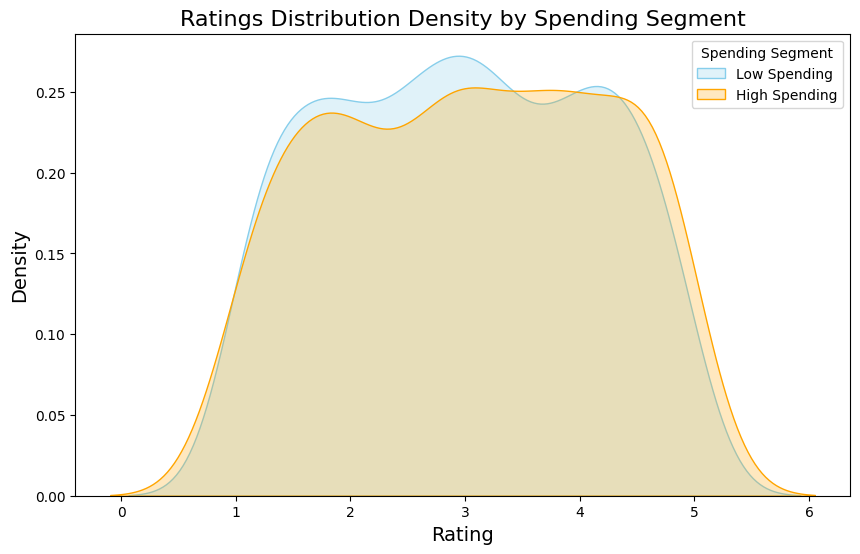

In [74]:
# Create KDE plot to show the density of ratings for each spending segment
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'Low Spending']['Rating'], label='Low Spending', shade=True, color='skyblue')
sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'High Spending']['Rating'], label='High Spending', shade=True, color='orange')

# Add more segments if applicable
# sns.kdeplot(data[data['Spending Segment'] == 'Medium Spending']['rating'], label='Medium Spending', shade=True, color='green')

# Title and labels
plt.title('Ratings Distribution Density by Spending Segment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend and plot
plt.legend(title='Spending Segment')
plt.show()


# Summary:

CatBoost, a gradient boosting framework works well with our training set beacuse of the presence of high number of categorical features and is also effective in predicting a continuous outcome (rating).